<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-1">Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Flip" data-toc-modified-id="Flip-1.1">Flip</a></span></li><li><span><a href="#Center-Crop" data-toc-modified-id="Center-Crop-1.2">Center Crop</a></span></li><li><span><a href="#Random-Crop" data-toc-modified-id="Random-Crop-1.3">Random Crop</a></span></li><li><span><a href="#Brightness" data-toc-modified-id="Brightness-1.4">Brightness</a></span></li><li><span><a href="#imgaug-라이브러리" data-toc-modified-id="imgaug-라이브러리-1.5">imgaug 라이브러리</a></span><ul class="toc-item"><li><span><a href="#Affine" data-toc-modified-id="Affine-1.5.1">Affine</a></span></li><li><span><a href="#Crop" data-toc-modified-id="Crop-1.5.2">Crop</a></span></li><li><span><a href="#Sequential" data-toc-modified-id="Sequential-1.5.3">Sequential</a></span></li><li><span><a href="#OneOf" data-toc-modified-id="OneOf-1.5.4">OneOf</a></span></li><li><span><a href="#Sometimes" data-toc-modified-id="Sometimes-1.5.5">Sometimes</a></span></li><li><span><a href="#여러-가지-조합" data-toc-modified-id="여러-가지-조합-1.5.6">여러 가지 조합</a></span></li></ul></li></ul></li></ul></div>

# Data Augmentation

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/ssac21/aiffel/data_augmentation/images/mycat.jpg'

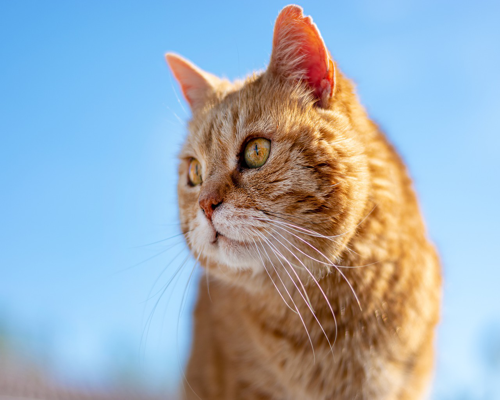

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

## Flip
- `flip_left_right`, `flip_up_down`
- `random_flip_left_right`, `random_flip_up_down`

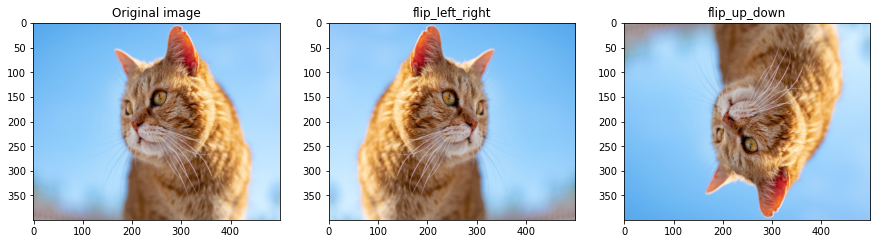

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

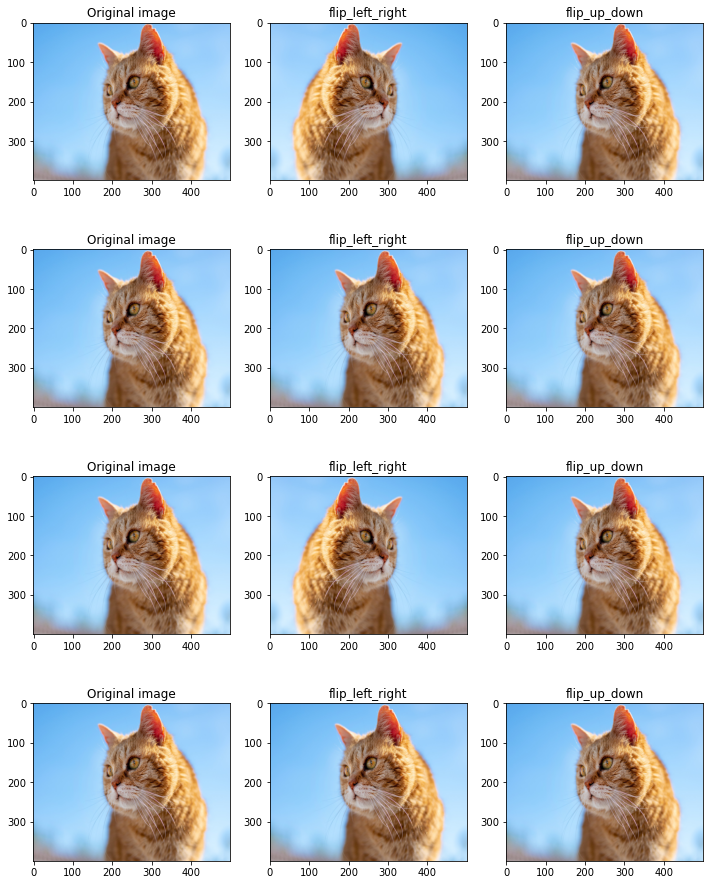

In [4]:
# Random Flip
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## Center Crop
- 중앙을 기준으로 이미지 확대
- 원본 형상을 유지할 수 있는 범위 내에서 확대해야 함에 주의
- `central_fraction`: 얼마나 확대할지 조절하는 매개변수(1.0은 원본 이미지와 동일)

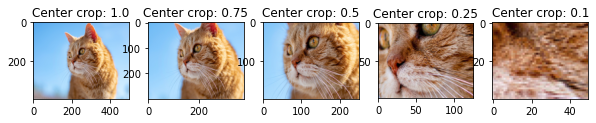

In [5]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

- 랜덤하게 `centeral_crop`을 적용하는 함수는 텐서플로우에서 기본적으로 제공되지 않습니다.
- 아래는 `tf.random.uniform`을 사용해서 `central_fraction` 매개변수에 전달할 값을 만들고 이를 사용해 `cropped_tensor`를 만들어내는 `random_central_crop()` 함수입니다.

In [6]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

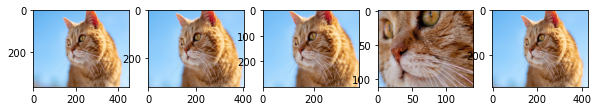

In [7]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## Random Crop

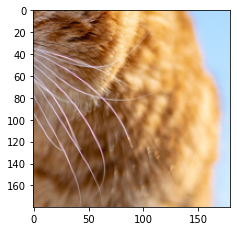

In [8]:
# apply random_crop on cat image
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

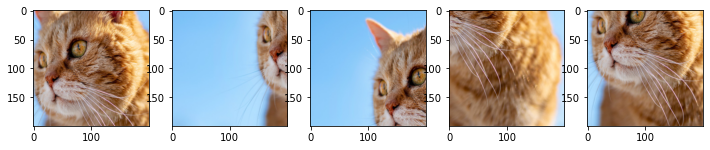

In [9]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))
for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

## Brightness

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


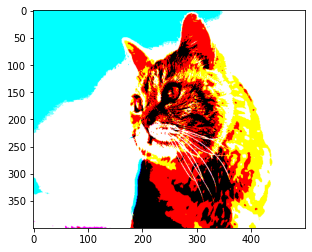

In [10]:
# apply random_brightness on cat image
cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
plt.imshow(cropped_tensor)

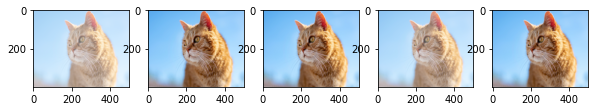

In [13]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    cropped_tensor = tf.image.random_brightness(image_tensor, max_delta=255)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## imgaug 라이브러리

In [14]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)  # 이미지를 numpy 배열로 변환하여 사용

### Affine
아핀 변환(Affine Transformation)은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변환을 줄 수 있습니다.

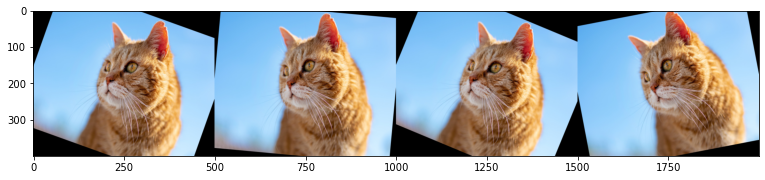

In [15]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))  # -25도와 25도 사이에서 랜덤하게 각도 변환
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### Crop

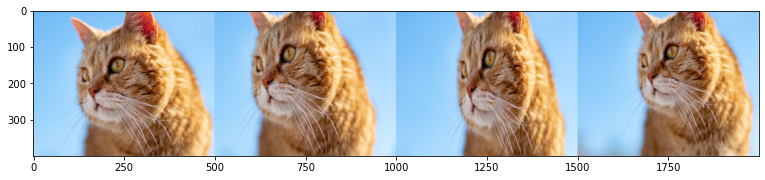

In [16]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### Sequential
여러 가지 augmentation 기법을 순차적으로 적용

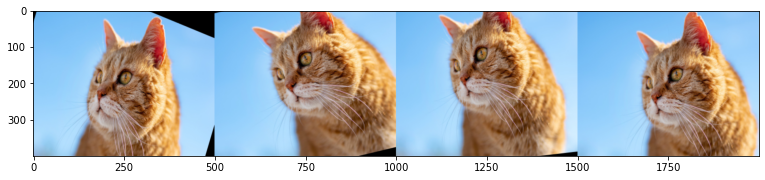

In [17]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

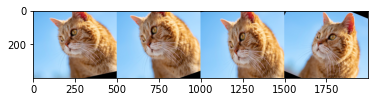

In [18]:
# modify iaa.sequential to use random step
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)
plt.imshow(np.hstack(images_aug))

### OneOf
여러 가지 augmentation 중 하나 선택

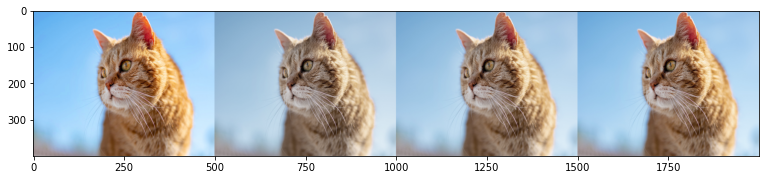

In [19]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

### Sometimes
augmentation 기법들을 일정 확률로 선택 적용

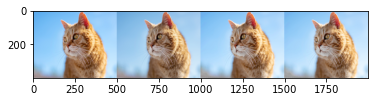

In [20]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))

### 여러 가지 조합

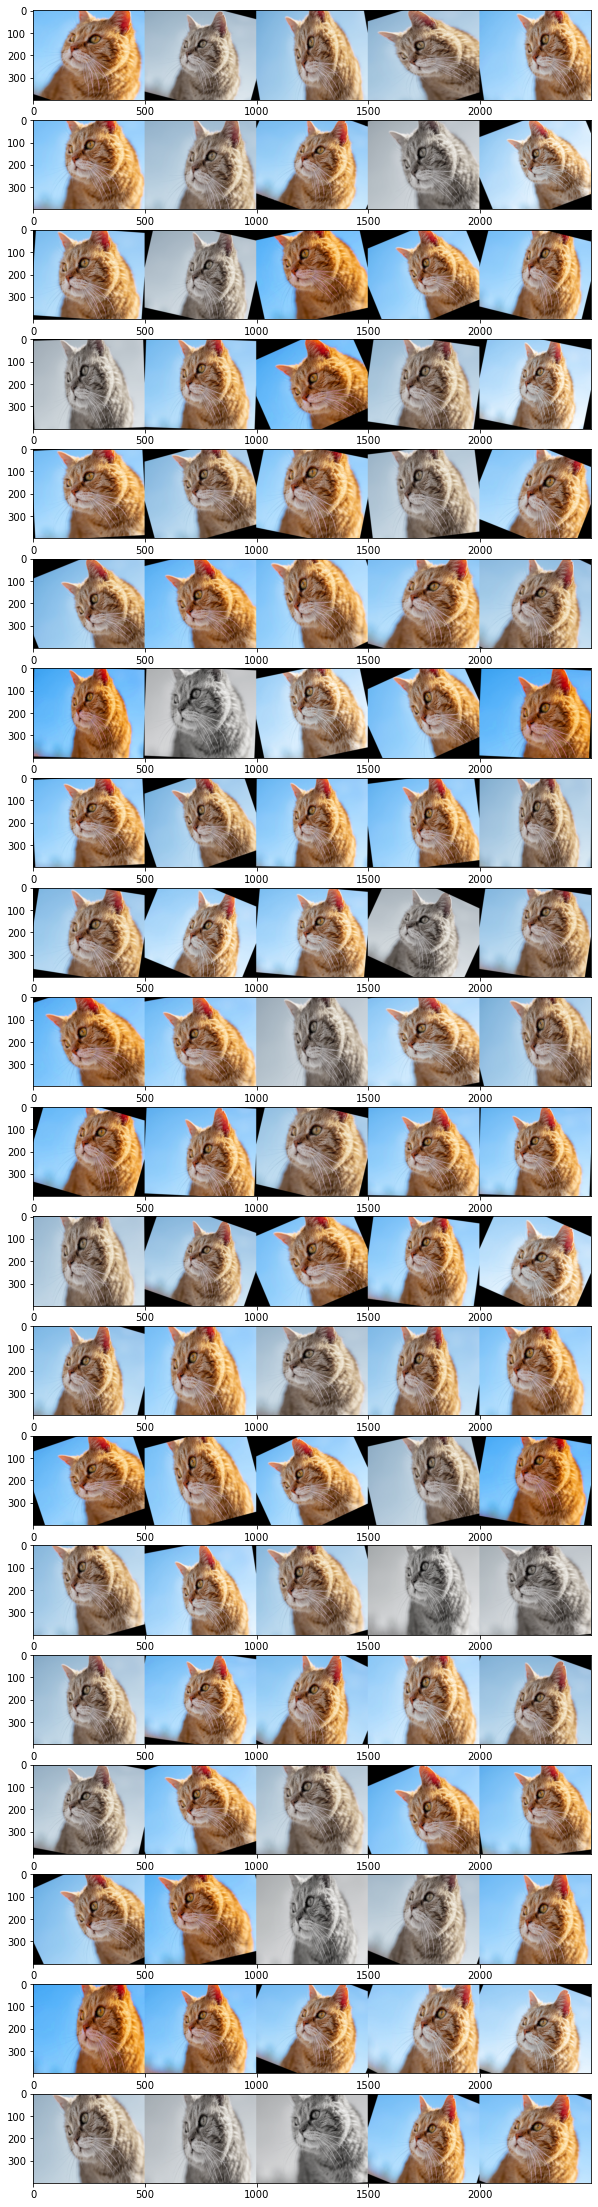

In [21]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()